In [2]:
file_dir = "D:/School/F22/ML+SL/project/"

In [3]:

from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
import pickle
import pandas
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import itertools
from sklearn.metrics import auc, roc_curve
import pandas as pd



['#0173b2', '#de8f05', '#029e73', '#d55e00', '#cc78bc', '#ca9161', '#fbafe4', '#949494', '#ece133']


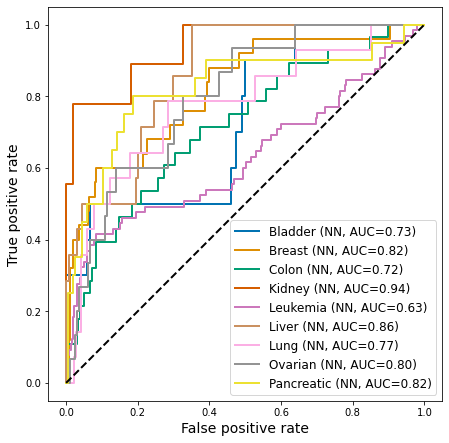

In [4]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

# Cancer type

cancerTypes = ["bladder", "breast", "colon", "kidney", "leukemia", "liver", "lung", "ovarian", "pancreatic"] 
available_samples = ["s1","s2","s3","s4","s5","s6","s7","s8","s9","s10"]

def hex_to_rgb(value, rgba=True):
    print(value)
    value = value.lstrip('#')
    lv = len(value)
    rgb = tuple(int(value[i:i + lv // 3], 16) for i in range(0, lv, lv // 3))
    if rgba:
        rgb = rgb + (1,)
    return rgb

# bestMethods["uterine"] = "nn" 

fig = plt.gcf()
# plt.figure(0).clf()
fig.set_size_inches(10, 7.25)

color_pal = sns.color_palette("colorblind", 9).as_hex()
# colors = ','.join(color_pal)
colors = color_pal
# colors = [hex_to_rgb(x) for x in color_pal] 
print(colors) 

# sys.exit(1)

for cancerId, cancerType in enumerate(cancerTypes):
    modelPerformancesFolder = file_dir + "Statistics/"
    model_name, approach_name =('nn','') #select_best_method(modelPerformancesFolder, cancerType, available_samples, True)
    
    filePath = modelPerformancesFolder + cancerType + "_model_selection_predictions.csv"
    dataframe = pandas.read_csv(filePath, header=0, sep=",")

    # Best method

    dataframe = dataframe[dataframe['model'] == model_name]
    y_test = dataframe['y_test'].values
    y_test = [x.split("|") for x in y_test]
    y_test = [item for sublist in y_test for item in sublist]
    y_test = [int(float(x)) for x in y_test]

    y_pred_rt = dataframe['y_pred_rt'].values
    y_pred_rt = [x.split("|") for x in y_pred_rt]
    y_pred_rt = [item for sublist in y_pred_rt for item in sublist]
    y_pred_rt = [float(x) for x in y_pred_rt]

    fpr, tpr, thresholds = roc_curve(y_test, y_pred_rt)
    auc_score = auc(fpr, tpr)

    plt.plot(fpr,tpr, linewidth=2, color=colors[cancerId], label=cancerType.capitalize() + " (" + model_name.upper() + ", AUC="+str(format(auc_score, '.2f'))+")")

    

import matplotlib.pylab as pylab
params = {'legend.fontsize': 'large',
        'axes.labelsize': 'x-large',
        'axes.titlesize':'x-large',
        'xtick.labelsize':'x-large',
        'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)

plt.legend(loc=4)

plt.axis('scaled')

plt.xlabel('False positive rate', fontsize=14)
plt.ylabel('True positive rate', fontsize=14)

# plt.tight_layout()

plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
# plt.suptitle('Generalization performance on the test set (AUC) across cancer types')

fig.savefig("PerformanceAcrossCancerTypes_NetworkEmbedding.png")
fig.savefig("PerformanceAcrossCancerTypes_NetworkEmbedding.svg")

plt.show()
